# Question 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
!wget www.cs.umn.edu/~sjguy/data/WhiteWine.txt

URL transformed to HTTPS due to an HSTS policy
--2023-10-28 04:50:33--  https://www.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www.cs.umn.edu (www.cs.umn.edu)... 104.18.21.107, 104.18.20.107, 2606:4700::6812:146b, ...
Connecting to www.cs.umn.edu (www.cs.umn.edu)|104.18.21.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-28 04:50:33--  http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cs.umn.edu (www-users.cs.umn.edu)... 134.84.66.195
Connecting to www-users.cs.umn.edu (www-users.cs.umn.edu)|134.84.66.195|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-28 04:50:33--  https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse

In [ ]:
df = pd.read_csv("WhiteWine.txt", sep = ',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: xlabel='quality', ylabel='count'>

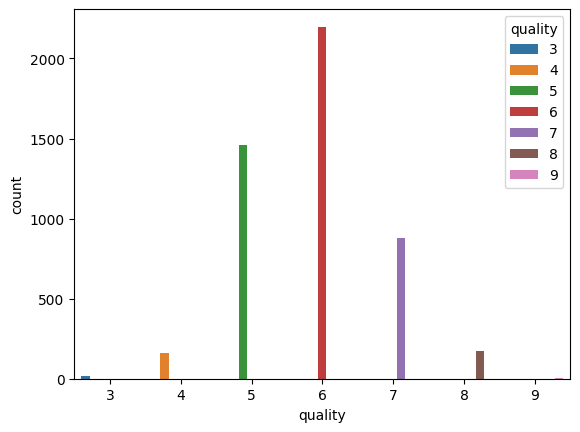

In [ ]:
sns.countplot(df, x="quality", hue="quality")


<Axes: xlabel='alcohol', ylabel='Count'>

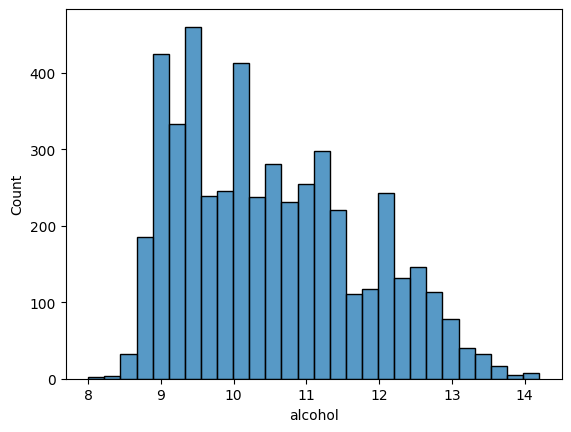

In [ ]:
sns.histplot(data=df, x="alcohol")

<Axes: xlabel='density', ylabel='Count'>

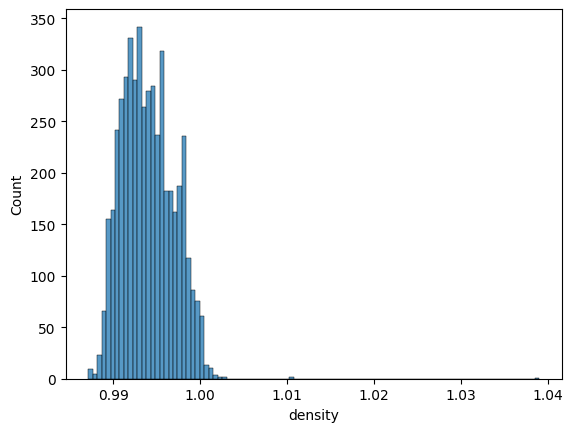

In [ ]:
sns.histplot(data = df, x = "density")

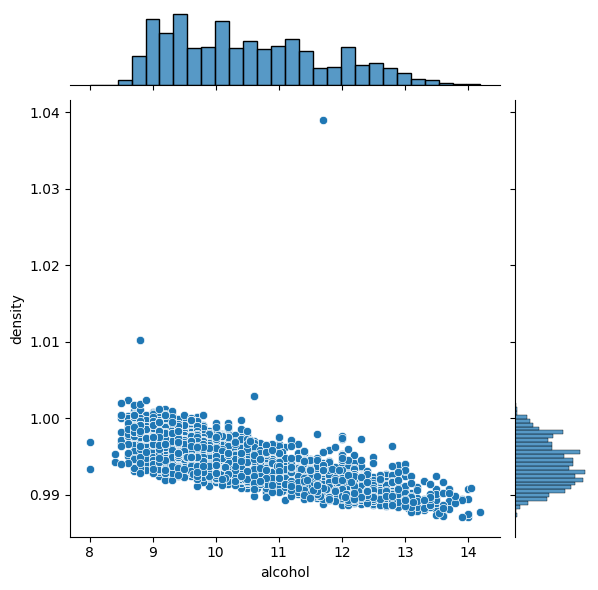

In [ ]:
sns.jointplot(data = df, x = "alcohol", y = "density")

In [ ]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<Axes: >

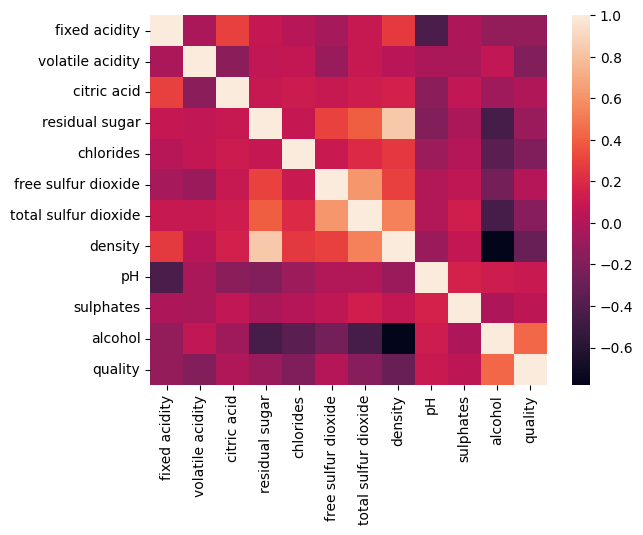

In [ ]:
sns.heatmap(correlation)

# Question 2

## Linear

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
import torch
torch.set_printoptions(sci_mode=False)

m = torch.Tensor([1.0]).float()
m.requires_grad = True
b = torch.Tensor([1.0]).float()
b.requires_grad = True

alcohol = df['alcohol'].to_numpy()
quality = df['quality'].to_numpy()

alcohol_norm = (alcohol - np.mean(alcohol)) / np.std(alcohol)


lin_x = torch.Tensor(alcohol_norm).float()
lin_y = torch.Tensor(quality).float()

In [ ]:
# to predict the unnormalized input, you would set alcohol = torch.Tensor(alcohol).float()
# then change lin_pred = m * alcohol * b

lr = .01
for epoch in range(300):
  lin_pred = m*lin_x+b
  loss_tenor = (lin_pred - lin_y)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%20==0:
    print("epoch:",epoch,"m=",m.item(),"b=",b.item(),"loss=",loss.item())

epoch: 0 m= 0.9877144694328308 b= 1.0975581407546997 loss= 24.80674934387207
epoch: 20 m= 0.787617027759552 b= 2.6865086555480957 loss= 11.408589363098145
epoch: 40 m= 0.654030442237854 b= 3.747304677963257 loss= 5.437023639678955
epoch: 60 m= 0.564846932888031 b= 4.455500602722168 loss= 2.775493621826172
epoch: 80 m= 0.5053073763847351 b= 4.928297996520996 loss= 1.5892475843429565
epoch: 100 m= 0.4655582308769226 b= 5.2439422607421875 loss= 1.060536503791809
epoch: 120 m= 0.43902143836021423 b= 5.4546685218811035 loss= 0.8248905539512634
epoch: 140 m= 0.42130526900291443 b= 5.595350742340088 loss= 0.7198634147644043
epoch: 160 m= 0.4094778299331665 b= 5.689270496368408 loss= 0.6730532646179199
epoch: 180 m= 0.40158170461654663 b= 5.751973628997803 loss= 0.6521894335746765
epoch: 200 m= 0.3963102102279663 b= 5.793834209442139 loss= 0.6428905725479126
epoch: 220 m= 0.39279091358184814 b= 5.821779727935791 loss= 0.6387462615966797
epoch: 240 m= 0.3904413878917694 b= 5.840436935424805 los

In [ ]:
data_array = np.array([lin_x.detach().numpy(),quality,lin_pred.detach().numpy()]).T
new_df = pd.DataFrame(data_array,columns=["alcohol","quality","quality_pred"], index=range(data_array.shape[0]))
new_df

,alcohol,quality,quality_pred
0,-1.393152,6.0,5.326893
1,-0.824276,6.0,5.547153
2,-0.336667,6.0,5.735948
3,-0.499203,6.0,5.673016
4,-0.499203,6.0,5.673016
...,...,...,...
4893,0.557282,6.0,6.082071
4894,-0.743008,5.0,5.578619
4895,-0.905544,6.0,5.515687
4896,1.857572,7.0,6.585523


<Axes: xlabel='quality', ylabel='quality_pred'>

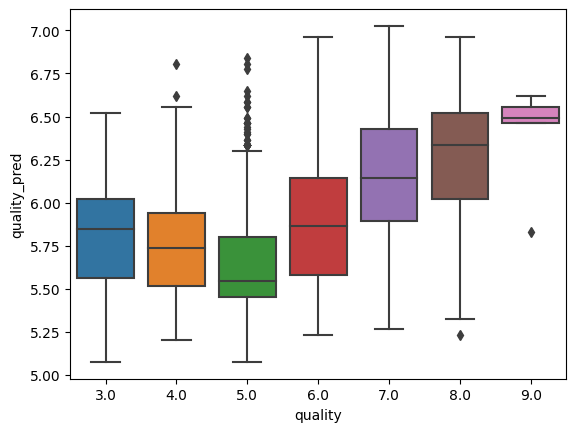

In [ ]:
sns.boxplot(data = new_df, x="quality", y = "quality_pred")

## Multi-linear

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
features = ["alcohol","pH","sulphates"]
mx = (df[features].values)
my = (df["quality"].values)

multi_x = torch.Tensor(mx).float()
multi_y = torch.Tensor(my).float()

In [ ]:
def multiLinearModel_withInteraction(params, inputs):
  multi_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]*(inputs[:,0]*inputs[:,1]) + params[4]
  return multi_pred

def gradDec(model, n_params, x, y, lr, n_epochs=2000, print_rate=200):

  params = 0.1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    multi_pred = model(params, x)
    loss_tenor = (multi_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    # if epoch%print_rate==0:
    #   print("epoch:",epoch,"loss=",loss.item())

  return params

In [ ]:
multi_x[0]

tensor([8.8000, 3.0000, 0.4500])

In [ ]:
x_mean = multi_x.mean(dim=0)
x_norm = (multi_x-x_mean)/x_mean
# y_mean = multi_y.mean(dim=0)
# y_norm = (multi_y-y_mean)/y_mean

In [ ]:
# to predict the unnormalized input, you pass in the multi_x tensor into multiLinearModel_withInteraction()
# that way the equation would utilized the unormalized 'alcohol' 'ph' and 'sulphates' features
# however, I tried it, and the unnormalized input breaks, does not converge.

p = gradDec(multiLinearModel_withInteraction,5,x_norm,multi_y,0.01,2000)
p

tensor([1.4163, 0.1889, 0.1925, 0.0538, 5.8779], requires_grad=True)

In [ ]:
multi_pred = multiLinearModel_withInteraction(p, x_norm)
multi_pred

tensor([5.6207, 5.7477, 5.8067,  ..., 5.7047, 6.1521, 5.9887],
       grad_fn=<AddBackward0>)

In [ ]:
data_array = np.column_stack((multi_x.detach().numpy(), multi_y.detach().numpy(), multi_pred.detach().numpy()))
new_df = pd.DataFrame(data_array,columns= features + ["quality","quality_pred"], index=range(data_array.shape[0]))
new_df

,alcohol,pH,sulphates,quality,quality_pred
0,8.8,3.00,0.45,6.0,5.620664
1,9.5,3.30,0.49,6.0,5.747743
2,10.1,3.26,0.44,6.0,5.806682
3,9.9,3.19,0.40,6.0,5.759925
4,9.9,3.19,0.40,6.0,5.759925
...,...,...,...,...,...
4893,11.2,3.27,0.50,6.0,5.979156
4894,9.6,3.15,0.46,5.0,5.740777
4895,9.4,2.99,0.46,6.0,5.704657
4896,12.8,3.34,0.38,7.0,6.152140


<Axes: xlabel='quality', ylabel='quality_pred'>

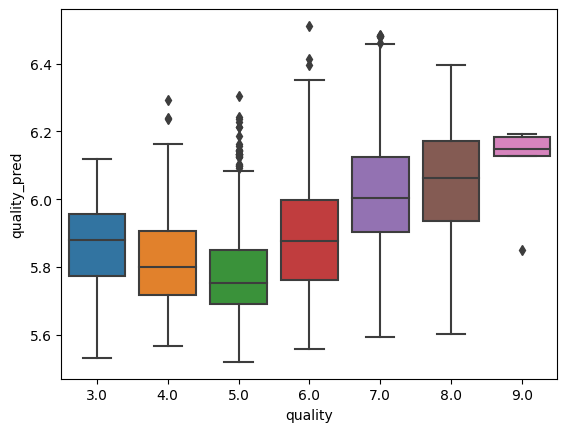

In [ ]:
sns.boxplot(data=new_df, y="quality_pred", x="quality")

## Non-linear

In [ ]:
features = ["alcohol","pH","sulphates"]
x = (df[features].values)
y = (df["quality"].values)


nonlin_x = torch.Tensor(x).float()
nonlin_y = torch.Tensor(y).float()

In [ ]:
def nonLinearModel_withInteraction(params, inputs):
  x0 = inputs[:, 0]
  x1 = inputs[:, 1]
  pred = (params[0]*x0) + (params[1] * x0**2) + (params[2] * torch.log(x1)) + params[3]
  return pred

In [ ]:
def nonLin_gradDec(model, n_params, x, y, lr, n_epochs=2000, print_rate=200):

  params = 0.1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    nonlin_pred = model(params, x)
    loss_tenor = (nonlin_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    # if epoch%print_rate==0:
    #   print("epoch:",epoch,"loss=",loss.item())

  return params

In [ ]:
params = nonLin_gradDec(nonLinearModel_withInteraction, 4, nonlin_x, nonlin_y, .00001)
params

tensor([0.1110, 0.0392, 0.0231, 0.1010], requires_grad=True)

In [ ]:
nonlin_pred = nonLinearModel_withInteraction(params, nonlin_x)

In [ ]:
data_array = np.column_stack((nonlin_x.detach().numpy(), y, nonlin_pred.detach().numpy()))
new_df = pd.DataFrame(data_array,columns= features + ["quality","quality_pred"], index=range(data_array.shape[0]))
new_df

,alcohol,pH,sulphates,quality,quality_pred
0,8.8,3.00,0.45,6.0,4.140271
1,9.5,3.30,0.49,6.0,4.722561
2,10.1,3.26,0.44,6.0,5.250086
3,9.9,3.19,0.40,6.0,5.070511
4,9.9,3.19,0.40,6.0,5.070511
...,...,...,...,...,...
4893,11.2,3.27,0.50,6.0,6.291140
4894,9.6,3.15,0.46,5.0,4.807493
4895,9.4,2.99,0.46,6.0,4.635057
4896,12.8,3.34,0.38,7.0,7.975207


<Axes: xlabel='quality', ylabel='quality_pred'>

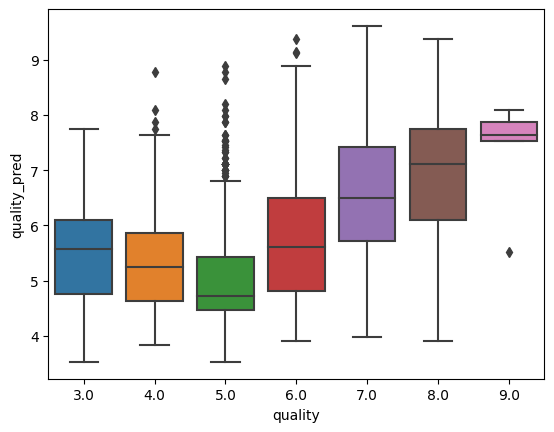

In [ ]:
sns.boxplot(data=new_df, y="quality_pred", x="quality")

# Question 3

In [ ]:
def accuracy(actual, pred, thresh):
  res = []
  acc = 0
  correct = 0
  for i in range(0,len(actual)):
    model_acc = np.abs(actual[i] - pred[i]) <= thresh
    res.append(model_acc)
    if(res[i]):
      correct += 1

  acc = correct / len(res)
  return acc

In [ ]:
model1_pred = lin_pred.detach().numpy()
model1_data = lin_y.detach().numpy()

model1_acc = accuracy(model1_data, model1_pred, .25)
print(model1_acc)
model1_acc = accuracy(model1_data, model1_pred, .5)
print(model1_acc)
model1_acc = accuracy(model1_data, model1_pred, 1)
print(model1_acc)

0.19273172723560636
0.4895875867701103
0.8327888934258881


In [ ]:
model2_pred = multi_pred.detach().numpy()
model2_data = multi_y.detach().numpy()


model2_acc = accuracy(model2_data, model2_pred, .25)
print(model2_acc)
model2_acc = accuracy(model2_data, model2_pred, .5)
print(model2_acc)
model2_acc = accuracy(model2_data, model2_pred, 1)
print(model2_acc)

0.34238464679461006
0.4485504287464271
0.8246222948142099


In [ ]:
model3_pred = nonlin_pred.detach().numpy()
model3_data = nonlin_y.detach().numpy()

model3_acc = accuracy(model3_data, model3_pred, .25)
print(model3_acc)
model3_acc = accuracy(model3_data, model3_pred, .5)
print(model3_acc)
model3_acc = accuracy(model3_data, model3_pred, 1)
print(model3_acc)

0.1490404246631278
0.34320130665577786
0.6267864434463046


#Question 4

In [ ]:
def split(X,y, custom_test_size):
  numRows = y.size #number or rows in the entire dataset
  splitPoint = int(numRows * custom_test_size) #the row index test_size% of the way through
  p = np.random.permutation(numRows) #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[splitPoint:] # training features
  y_train = y[splitPoint:] # training labels

  #Testing data array
  X_test = X[:splitPoint] # testing features
  y_test = y[:splitPoint] # testing labels

  return X_train, X_test, y_train, y_test

##linear model cross validation

In [ ]:

k = 10
accuracies = []
threshold = .25
for i in range(1, k):
  lin_Xtrain, lin_Xtest, lin_ytrain, lin_ytest = split(alcohol, quality, 0.2)

  lin_Xtrain = torch.Tensor(lin_Xtrain).float()
  lin_Xtest = torch.Tensor(lin_Xtest).float()
  lin_ytrain = torch.Tensor(lin_ytrain).float()
  lin_ytest = torch.Tensor(lin_ytest).float()

  mean = lin_Xtrain.mean(dim=0)
  Xtrain_norm = (lin_Xtrain-mean)/mean
  mean = lin_Xtest.mean(dim=0)
  Xtest_norm = (lin_Xtest - mean)/mean

  lr = .01
  for epoch in range(300):
    lin_pred = m*Xtest_norm+b
    loss_tenor = (lin_pred - lin_ytest)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      m -= m.grad*lr
      b -= b.grad*lr
      m.grad.zero_()
      b.grad.zero_()
  cross_model1 = accuracy(lin_ytest.detach().numpy(), lin_pred.detach().numpy(), threshold)
  print("accuracy: ", cross_model1)
  accuracies.append(cross_model1)

  if(i == 3 or i == 6 or i == 9):
    score_mean = np.mean(accuracies)
    score_stddev = np.std(accuracies)
    print("mean: ", score_mean)
    print("std: ", score_stddev)
    accuracies = []
    threshold *= 2

accuracy:  0.47497446373850866
accuracy:  0.38202247191011235
accuracy:  0.36465781409601633
mean:  0.4072182499148791
std:  0.04843250436800488
accuracy:  0.432073544433095
accuracy:  0.4218590398365679
accuracy:  0.44228804902962204
mean:  0.432073544433095
std:  0.008340108078934889
accuracy:  0.8130745658835546
accuracy:  0.8283963227783453
accuracy:  0.8355464759959143
mean:  0.8256724548859381
std:  0.009374123185520082


##multi linear model cross validation

In [ ]:

k = 10
accuracies = []
threshold = .25

for i in range(1, k):
  multi_Xtrain, multi_Xtest, multi_ytrain, multi_ytest = split(mx, my, 0.2)

  multi_Xtrain = torch.Tensor(multi_Xtrain).float()
  multi_Xtest = torch.Tensor(multi_Xtest).float()
  multi_ytrain = torch.Tensor(multi_ytrain).float()
  multi_ytest = torch.Tensor(multi_ytest).float()


  Xtrain_mean = multi_Xtrain.mean(dim=0)
  Xtrain_norm = (multi_Xtrain - Xtrain_mean) / Xtrain_mean
  Xtest_mean = multi_Xtest.mean(dim=0)
  Xtest_norm = (multi_Xtest - Xtest_mean) / Xtest_mean


  p = gradDec(multiLinearModel_withInteraction,5,Xtest_norm,multi_ytest,0.01,2000)

  multi_pred = multiLinearModel_withInteraction(p, Xtest_norm)
  cross_model2 = accuracy(multi_ytest.detach().numpy(), multi_pred.detach().numpy(), threshold)
  print("accuracy: ", cross_model2)
  accuracies.append(cross_model2)
  if(i == 3 or i == 6 or i == 9):
    score_mean = np.mean(accuracies)
    score_stddev = np.std(accuracies)
    print("mean: ", score_mean)
    print("std: ", score_stddev)
    accuracies = []
    threshold *= 2


accuracy:  0.34831460674157305
accuracy:  0.38202247191011235
accuracy:  0.36772216547497444
mean:  0.36601974804222
std:  0.013813730183929706
accuracy:  0.4627170582226762
accuracy:  0.44433094994892747
accuracy:  0.44126659856996936
mean:  0.449438202247191
std:  0.009472541874867943
accuracy:  0.81511746680286
accuracy:  0.8232890704800817
accuracy:  0.8294177732379979
mean:  0.82260810350698
std:  0.005857899398735197


In [ ]:

k = 10
accuracies = []
threshold = .25

for i in range(1, k):
  nonlin_Xtrain, nonlin_Xtest, nonlin_ytrain, nonlin_ytest = split(x, y, 0.2)

  nonlin_Xtrain = torch.Tensor(multi_Xtrain).float()
  nonlin_Xtest = torch.Tensor(multi_Xtest).float()
  nonlin_ytrain = torch.Tensor(multi_ytrain).float()
  nonlin_ytest = torch.Tensor(multi_ytest).float()



  p = gradDec(nonLinearModel_withInteraction,4,nonlin_Xtest,nonlin_ytest, .00001)
  nonlin_pred = nonLinearModel_withInteraction(p, nonlin_Xtest)
  cross_model3 = accuracy(nonlin_ytest.detach().numpy(), nonlin_pred.detach().numpy(), threshold)
  print("accuracy: ", cross_model3)
  accuracies.append(cross_model3)
  if(i == 3 or i == 6 or i == 9):
    score_mean = np.mean(accuracies)
    score_stddev = np.std(accuracies)
    print("mean: ", score_mean)
    print("std: ", score_stddev)
    accuracies = []
    threshold *= 2

accuracy:  0.17160367722165476
accuracy:  0.1634320735444331
accuracy:  0.17262512768130744
mean:  0.16922029281579842
std:  0.004114077621244321
accuracy:  0.3472931562819203
accuracy:  0.3105209397344229
accuracy:  0.34627170582226763
mean:  0.33469526727953697
std:  0.01709891662170883
accuracy:  0.6322778345250255
accuracy:  0.6189989785495403
accuracy:  0.6189989785495403
mean:  0.6234252638747021
std:  0.0062597127377767145
